In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

### Optimization

In [3]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [11]:
def f(x):
    return (x-3)**2

res=minimize(f,2)
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [13]:
res.x[0]

2.999999992549203

Minimize $f(x,y) = (x-1)^2 +(y-\frac{5}{2})^2 $ sbjectec to
$$\\ x-2y+2 \geq 0 \\
-x-2y+6 \geq 0 \\
-x+2y+2 \geq 0 \\
x \geq 0 \\
y \geq 0
$$
* 2D function takes in vector $x$
* Constraints must be specified as $g_i (x) \geq 0$ 
* Bounds specified as rectangular
<p align=\"center\">
<img src=\"C:/Users/HP/OneDrive - Universidad Autonoma de Santo Domingo/Programing/Project/Python/Intro/opt_reg.PNG"alt=\"drawing\" width=\"300\" align=\"center\"/>

In [17]:
f= lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
cons = ({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
       {'type':'ineq','fun':lambda x:-x[0]-2*x[1]+6},
       {'type':'ineq','fun':lambda x:-x[0]+2*x[1]+2},
       )
bnds =((0,None),(0,None))
res = minimize(f,(2,0),bounds=bnds, constraints=cons)
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [18]:
res.x

array([1.4, 1.7])

### Interpolation

Suppose you have the following data (I Generate it here, but perhaps you colect $x$ and $y$ by means of some experiment)

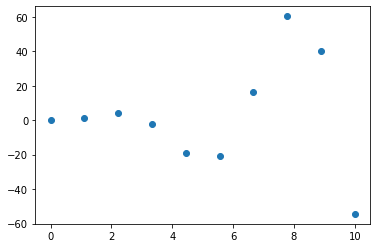

In [19]:
x =np.linspace(0,10,10)
y= x**2 * np.sin(x)
plt.scatter(x,y)

In [21]:
from scipy.interpolate import interp1d

In [26]:
f=interp1d(x,y,kind='linear')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)

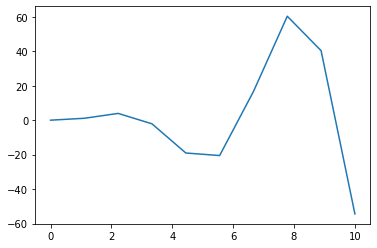

In [27]:
plt.plot(x_dense,y_dense)

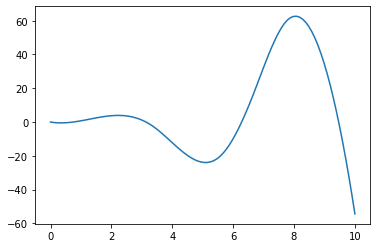

In [28]:
f=interp1d(x,y,kind='cubic')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)
plt.plot(x_dense,y_dense)

### Curve Fitting
trivial example

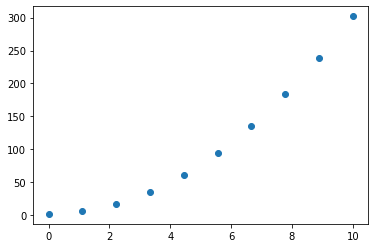

In [9]:
x_data=np.linspace(0,10,10)
y_data=3*x_data**2 +2
plt.scatter(x_data,y_data)

Want to fit the data to the curve $y=ax^2+b$. the main goal here is determine the values of $a$ and $b$.

In [5]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x**2+b
popt,pcov = curve_fit(func,x_data,y_data,p0=(1,1))

In [34]:
popt

array([3., 2.])

In [35]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

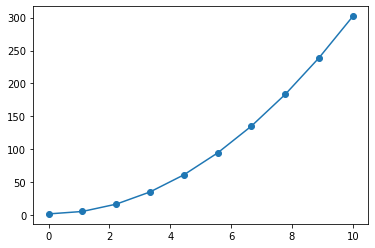

In [11]:
a,b=popt
x=np.linspace(0,10,10)
y=a*x**2 +b
plt.scatter(x_data,y_data)
plt.plot(x,y)

The equation for spring is $y(t) = A\cos(\omega t + \phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. you collect the data.

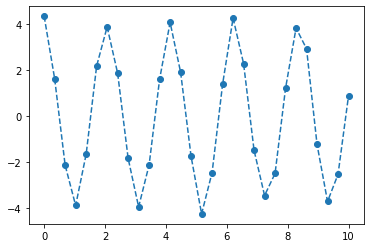

In [37]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])
plt.plot(t_data,y_data,'o--')

$\omega =2 \pi f, f=\frac{1}{T}$, and $T \approx 2$. Thus initial guess is

* $\omega =2 \pi \frac{1}{2} = \pi$
* A = 4
* $\phi =0$


In [42]:
def func(x,A,w,phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func,t_data,y_data, p0=(4,np.pi,0))

In [43]:
A,w,phi=popt

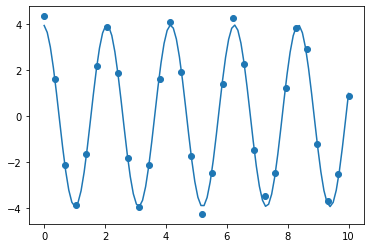

In [45]:
t=np.linspace(0,10,100)
y=func(t,A,w,phi)

plt.scatter(t_data,y_data)
plt.plot(t,y)

Parameters

In [50]:
popt

array([3.94836219, 2.99899521, 0.10411352])

The estimated error on the parameters

In [51]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575701])

# Special funtion

Legendre polynomials $P_i (x)$: satisfy $x^2y''+xy'+ (x^2+a^2)y=0$

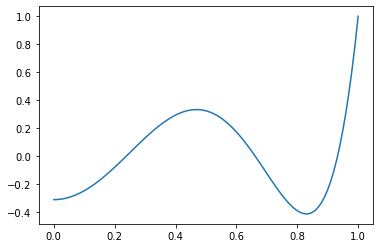

In [53]:
from scipy.special import legendre
x=np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))


Bessel function $J_a(x)$: satisfy $x^2y'' +xy'+(x^2-a^2)y = 0$

* Laplace's Ecuation in polar Coordinates

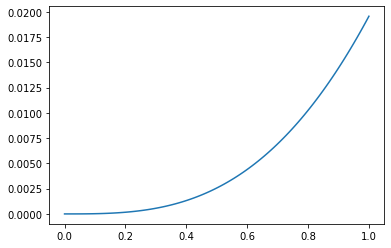

In [54]:
from scipy.special import jv
x=np.linspace(0,1,100)
plt.plot(x,jv(3,x))


# calculus

### Differentiation

In [55]:
from scipy.misc import derivative

$$\frac{d}{dx} x^2 e^{-x} \sin(2x)$$

In [61]:
def f(x):
    return x**2 * np.sin(2*x)*np.exp(-x)
x=np.linspace(0,1,100)
dfdx=derivative(f,x,dx=1e-6)

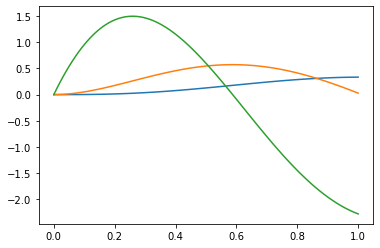

In [65]:
plt.plot(x,f(x))
plt.plot(x,dfdx)
plt.plot(x,derivative(f,x,dx=1e-6, n=2))

### Integration

single integrals

$$ \int_0^1 x^2 \sin(2x) e^{-x} dx$$

In [68]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral,integral_error = quad(integrand,0,1)
integral

1.6162822047366225e-15

In [69]:
integral_error

1.6162822047366225e-15

Double integrals 

$$\int_0^1 \int_{-x}^{x^2} \sin(x+y^2 dydx$$

In [70]:
from scipy.integrate import dblquad

In [73]:
integrand = lambda x,y: np.sin(x+y**2)
lwr_y =lambda x: -x
upr_y =lambda x: x**2
integral, integral_error =dblquad(integrand,0,1,lwr_y,upr_y)


In [74]:
integral

0.315802507240474

In [75]:
integral_error

1.5634600713498928e-14

## Diferential Ecuation

### First Order ODEs

Air friction about falling

$$v' - \alpha v^2 +\beta = 0 \hspace{10mm} v(0)=0$$

In [76]:
from scipy.integrate import odeint

All information about differential equation

In [77]:
def dvdt(v,t):
    return 3*v**2-5
v0 = 0

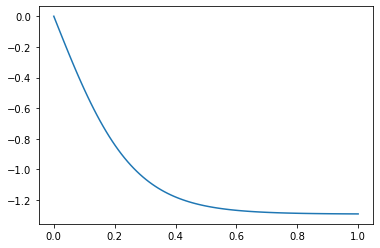

In [84]:
t=np.linspace(0,1,100)
sol=odeint(dvdt,v0,t)
plt.plot(t,sol.T[0])

Couple first order ODEs

$$y_1'=y_1+y_2^2 + 3x \hspace{10mm} y_1 (0) = 0 \\$$
$$y_2'=3y_1+y_2^3 - \cos(x) \hspace{10mm} y_2 (0) = 0$$ 


Letting $S=(y_1,y_2)$ we need to write a function that returns $\frac{dS}{dx} = (\frac{dy_1}{dx} , \frac{dy_2}{dx})$. the function$\frac{dS}{dx}$ can take in $S=(y_1,y_2)$.

In [88]:
def dSdx(S,x):
    y1,y2=S
    return [y1+y2**2+3*x,
            3*y1+y2**3-np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0,y2_0)

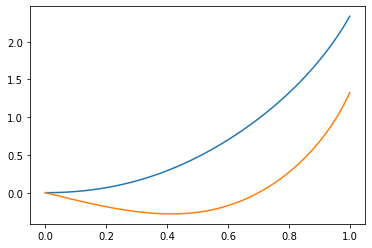

In [100]:
x=np.linspace(0,1,100)
sol=odeint(dSdx,S_0,x)
y1,y2 = sol.T
plt.plot(x,y1)
plt.plot(x,y2)

### Second Order ODEs

Equation for a pendulum

$$\theta'' -\sin(\theta)=0$$

Scipy can only solve couple first order ODEs, but **any second order ODE can be turned into two couple first order ODEs.** 
the same thing goes for higher order ODEs.

Define $\omega = \frac{d\theta}{dt}$ so that one has the following couple ODEs.

$$\frac{d\omega}{dt} = \sin(\theta) \\
\frac{d\theta}{dt} = \omega$$

Let $S=(\theta, \omega)$

In [107]:
def dSdt(S, t):
    theta,omega=S
    return [omega,
            np.sin(theta)]
theta0=np.pi/4
omega0=0
S0=(theta0,omega0)

In [109]:
t = np.linspace(0,20,100)
sol=odeint(dSdt,S0,t)
theta,omega=sol.T

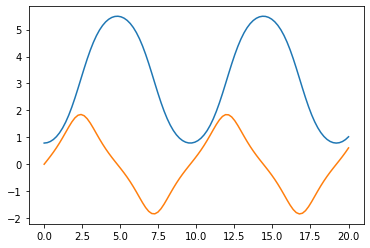

In [111]:
plt.plot(t,theta)
plt.plot(t,omega)

# Fourier Transform
The discrete Fourier transform is define as
$$y[k] = \sum_{n=0}^{N-1} e^{- \pi in \left(\frac{k}{N} \right)} x(n)$$

* $\frac{k}{N}$ represents a spesific frecuency (dimentionless)
* can be converted to frequency(Hz) if you know the spacing in $x$

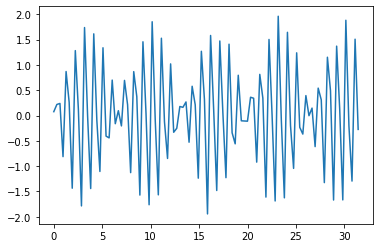

In [130]:
t=np.linspace(0,10*np.pi,100)
x= np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t,x)

In [143]:
from scipy.fft import fft, fftfreq
N=len(x)
y=fft(x)[:N//2]
f=fftfreq(N,np.diff(t)[0])[:N//2]

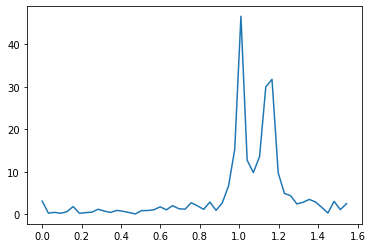

In [144]:
plt.plot(f,np.abs(y))

# Examples
#### Example 1. 
The energy required to get from point $\vec{r_1}$ to point $\vec{r_2}$ for a plane is given by

$$ E= \alpha \int_{C} \left|\frac{d\vec{r}}{dt}\right| dt - \int_{C} \vec{F} \cdot \frac{d \vec{r}}{dt} dt$$
 
Suppose that $\alpha = 5$ and our start and ends points are $\vec{r_1} =(0,0)$ and $\vec{r_2} =(0,10)$.
On this particular day, the wind produces a force field $\vec{F} = \left(0,\frac{-2}{(x+1)^2}\right)$. 
Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\frac{\pi t}{10})\vec{x} + t\vec{y}$
 that minimizes the work.

Then $x=A\sin(\frac{\pi t}{10})$, $y=t$, and $\left|\frac{d\vec{r}}{dt}\right| = \sqrt{1+(\frac{\pi t}{10})^2 \cos^2(\frac{\pi t}{10})}$

$\vec{F} \cdot \frac{d\vec{r}}{dt} = \begin{bmatrix} 0 \\ -\frac{2}{(A \sin(\frac{\pi t}{10})+1)^2} \\ \end{bmatrix} \cdot \begin{bmatrix} \frac{\pi A}{10} \cos(\frac{\pi t}){10} \\ 1 \end{bmatrix} = -\frac{2}{(A \sin(\frac{\pi t}{10})+1)^2}$ 

 so that
$E =\int_{0}^{10} \left(5 \sqrt{1+(\frac{\pi t}{10})^2 \cos^2(\frac{\pi t}{10})}  -\frac{2}{(A \sin(\frac{\pi t}{10})+1)^2}\right) dt$ 

In [149]:
def f(A):
    integrand= lambda t: 2 / (1 + np.abs(A*np.sin(t*np.pi/10)))**2 + 5*np.sqrt(1+(A*np.pi/10)**2 * np.cos(t*np.pi/10)**2)
    return quad(integrand, 0, 10)[0]
minimize(f,0.001).x

array([1.42591114])

# Example 2: 

Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t))$$
 
where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$
(which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and 
$T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:

In [150]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature[K]')

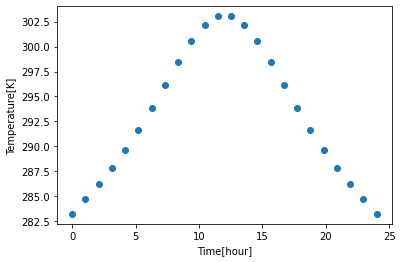

In [153]:
plt.scatter(t_m,temp_m)
plt.xlabel('Time[hour]')
plt.ylabel('Temperature[K]')

In [155]:
Ts= interp1d(t_m, temp_m, kind='cubic')

In [163]:
def dTdt(T,t):
    return -0.5*(T-Ts(t))
times= np.linspace(1,23,1000)
T0=284.6945461

In [166]:
sol= odeint(dTdt,T0,times).T[0]

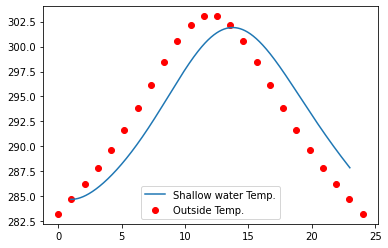

In [168]:
plt.plot(times,sol, label="Shallow water Temp.")
plt.scatter(t_m,temp_m, color='r', label= 'Outside Temp.')
plt.legend()

# Lineal Algebra

### Basics
Triangular Matrices
$$\begin{bmatrix} 3&0&0&0 \\ 2&1&0&0 \\ 1&0&1&0 \\ 1&1&1&1 \\ \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix}$$

In [172]:
from scipy.linalg import solve_triangular
a = np.array([[3,0,0,0],
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]])
b=np.array([4,2,4,2])
x=solve_triangular(a,b,lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices(matrices with constant diagonal)
$$\begin{bmatrix} 1&-1&2&3 \\ 3&1&-1&2 \\ 6&3&1&-1 \\ 10&6&3&1 \\ \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix}$$

In [176]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1,3,6,10])
r = np.array([1,-1,-2,-3])
b = np.array([1,2,2,5])
x=solve_toeplitz((c,r),b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

# Eigenvalue Problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

$$\begin{bmatrix} 3&-1&0&0 \\ -1&3&0&0 \\ 0&-1&3&-1 \\ 0&0&-1&3 \\ \end{bmatrix} \vec{x} = \lambda x$$

In [177]:
from scipy.linalg import eigh_tridiagonal

In [183]:
d= 3*np.ones(4)
e = -1*np.ones(3)
A=np.diag(d)+np.diag(e,k=1)+np.diag(e,k=-1)
w,v = eigh_tridiagonal(d,e)

In [184]:
v.T[1]

array([ 0.60150096,  0.37174803, -0.37174803, -0.60150096])

# Special Matrices
Fiedler matrix $A_{ij} = |a_i-a_j|$ where $a_i$ is some sequence of numbers

In [188]:
from scipy.linalg import fiedler
fiedler([1,4,12,45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices (matrices with constant diagonals)

In [189]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0],[1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

# Decompositions

LU decomposition $A= PLU$ where $P$ is apermutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [190]:
from scipy.linalg import lu

In [194]:
A=np.array([[2,5,7,8],[5,2,2,8],[7,5,6,6],[5,4,4,8]])
p,l,u =lu(A)

Choleski decomposition: find matrix $C$ such that $A=CC^T$

In [191]:
from scipy.linalg import cholesky

In [201]:
A=np.array([[1,0.2],[0.2,1]])
c= cholesky(A,lower=True)
c

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

# Sparse Matrices
Matrices that contain lots of zeros (so lots of space can be reduced)

### A Useful Example:
The second derivative of $f(x_i) \equiv f_i$ is approximated as $\frac{d^2f_i}{dx^2} \approx \frac{f_{i+1} + f_{i-1} -2f_i}{\Delta X^2}$. Suppose we have $f_0,...,f_4$ and $f_0 = f_4 = 0$ (boundary conditions). Then the second derivative is approximated as 

 $$\begin{bmatrix} f_1 \\ f_2 \\ f_3 \end{bmatrix} \hspace{6mm} \text{where} \hspace{6mm} D = \frac{1}{\delta x^2} \begin{bmatrix} -2&1&0 \\ 1&-2&1 \\ 0&1&-2 \end{bmatrix}$$
 
In 2D our function can be discretized on a grid

 $$\begin{bmatrix} 0&0&0&0&0 \\ 0&f_{11}&f_{12}&f_{13}&0 \\ 0&f_{21}&f_{22}&f_{23}&0 \\ 0&f_{31}&f_{32}&f_{33}&0 \\ 0&0&0&0&0 \end{bmatrix}$$
but when doing this sort of work, its always better to store information in a vector

  $$\begin{bmatrix} 0&0&0&0&0 \\ 0&f_{11}&f_{12}&f_{13}&0 \\ 0&f_{21}&f_{22}&f_{23}&0 \\ 0&f_{31}&f_{32}&f_{33}&0 \\ 0&0&0&0&0 \end{bmatrix} = \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} $$
 
What does the 2D laplacian look like? It turns out it is the "Kroncker sum" of our original matrix. The second derivative is given by

 $$D \oplus D \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} \hspace{6mm} \text{where} \hspace{6mm} D = \frac{1}{\delta x^2} \begin{bmatrix} -2&1&0 \\ 1&-2&1 \\ 0&1&-2 \end{bmatrix}$$
 
Note that even though  is 3x3,  is 9x9.



In [217]:
from scipy.linalg import kron
N=5
d=-2*np.ones(N)
e=np.ones(N-1)
D=np.diag(d)+np.diag(e,k=1)+np.diag(e,k=-1)
D_kronsum=kron(D,np.identity(N))+kron(np.identity(N),D)
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

Too big for any reasonable calculation! But can use sparse matrices

In [218]:
from scipy import sparse
N=100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
sparse.kronsum(D,D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

See my 2D Schrodinger video for how I use this to construct eigenstates for arbitrary potentials!

# Statistics
***Example 1***: $\beta$ distribution
$$f(x;a,b) = \frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{15mm} 0 \leq x \leq 1$$

In [234]:
from scipy.stats import beta

Basic Statistics

In [235]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

Probability Distribution Plotting:

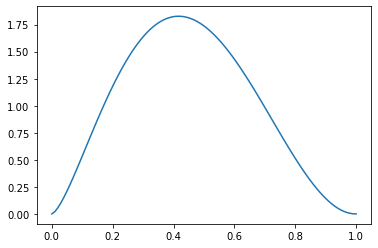

In [239]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

**Example 3**: Gaussian Distribution

$$f(x;\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp} -\left(\frac{(x-\mu)^2}{\sigma^2}\right) \hspace{15mm} -\infty \leq x \leq \infty
$$

In [240]:
from scipy.stats import norm

In [243]:
mu=1
sigma=2
mean,var = norm.stats(loc=mu,scale=sigma,moments='mv')

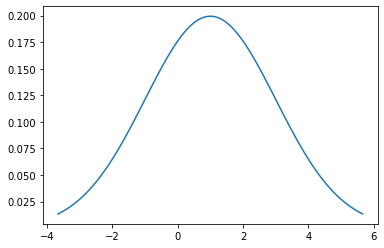

In [247]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

**Example 3**: Multinomial Distribution

 $$f(x_1,x_2,...,x_k;p_1,p_2,...p_k,n) = \frac{n!}{x_1!...x_k} p_1^{x_1} p_2^{x_2}...p_k^{x_k}$$
Rolling a die

In [250]:
from scipy.stats import multinomial
p=np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0],n=6,p=p)

2.143347050754453e-05

In [253]:
multinomial.rvs(n=100,p=p,size=5)

array([[13, 15, 28, 15, 14, 15],
       [13, 19, 13, 13, 19, 23],
       [13, 20,  7, 21, 22, 17],
       [18, 17, 18, 16, 16, 15],
       [19, 27, 17, 10, 15, 12]])

**Example 4**: Generating Random Numbers from your own distribution
$$f(x;a_1,a_2,b_1,b_2) = \frac{1}{2(a_1b_1+a_2b_2)} \left(b_1 \text{exp} \left(-\sqrt{\frac{x}{a_1}} \right) + b_2 \text{exp} \left(-\sqrt{\frac{x}{a_2}}\right) \right) \hspace{20mm} 0 \leq x \leq \infty$$


In [254]:
import scipy.stats as st

class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
my_rv = mr_p_solver_dist(a=0, b=np.inf)

In [255]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01, a1, a2, b1, b2), my_rv.ppf(0.99, a1, a2, b1, b2), 100)
y = my_rv.pdf(x, a1, a2, b1, b2)

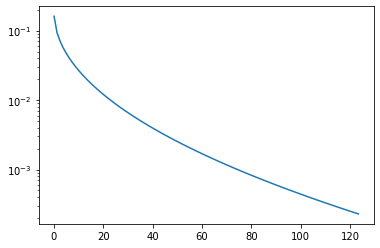

In [256]:
plt.plot(x, y)
plt.semilogy()
plt.show()

In [257]:
my_rv.rvs(a1, a2, b1, b2, size=10)

array([15.11984411, 28.00302289, 26.66066462,  6.12498504,  5.96000164,
       85.92401183,  0.52912653,  1.9648796 , 16.25913855,  1.13229747])

In [258]:
class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
    def _cdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))* ( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
           -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
           + 2*a1*b1 + 2*a2*b2 )
    def _rvs(self, a1, a2, b1, b2, delta=0.001, size=None, random_state=None):
        a_min = min([a1, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1], a1, a2, b1, b2), r)]

In [274]:
my_rv = mr_p_solver_dist(a=0, b=np.inf)
my_rv._rvs(a1, a2, b1, b2, size=10000)

array([ 9.34393924,  3.01602125, 10.45108628, ..., 12.49358169,
       19.56596062,  5.91751004])